### TextBlob: Simplified Text Processing

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

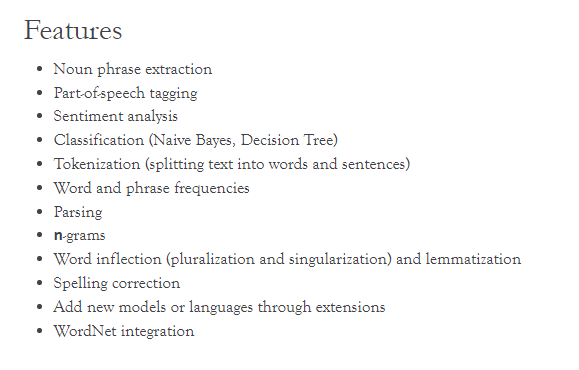

In [1]:
import textblob
from textblob import TextBlob

### Create a TextBlob

In [2]:
# textblob.TextBlob(
#     text,
#     tokenizer=None,
#     pos_tagger=None,
#     np_extractor=None,
#     analyzer=None,
#     parser=None,
#     classifier=None,
#     clean_html=False,
# )

In [3]:
text = textblob.TextBlob(text="Python is a high-level, general-purpose programming language.")

In [4]:
type(text)

textblob.blob.TextBlob

### Part-of-speech Tagging

Part-of-speech tags can be accessed through the tags property.

In [5]:
text.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

### Noun Phrase Extraction

Similarly, noun phrases are accessed through the noun_phrases property.

In [6]:
text.noun_phrases

WordList(['python'])

### Sentiment Analysis

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [7]:
text2 = textblob.TextBlob(text="Textblob is amazingly simple to use. What great fun!")

In [8]:
text2.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [9]:
text2.sentiment.polarity

0.39166666666666666

In [10]:
text2.sentiment.subjectivity

0.4357142857142857

### Tokenization

You can break TextBlobs into words or sentences.

In [11]:
text3 = TextBlob(text="""Beautiful is better than ugly.
                         Explicit is better than implicit.
                         Simple is better than complex.""")

In [12]:
# Word tokenization

text3.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex'])

In [13]:
# Count the frequency

text3.word_counts

defaultdict(int,
            {'beautiful': 1,
             'is': 3,
             'better': 3,
             'than': 3,
             'ugly': 1,
             'explicit': 1,
             'implicit': 1,
             'simple': 1,
             'complex': 1})

In [14]:
type(text3.word_counts)

collections.defaultdict

In [15]:
# Sentence tokenization

text3.sentences

[Sentence("Beautiful is better than ugly."),
 Sentence("Explicit is better than implicit."),
 Sentence("Simple is better than complex.")]

In [16]:
type(text3.sentences)

list

In [17]:
# Sentence objects have the same properties and methods as TextBlobs.

for sentence in text3.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.2166666666666667, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)


### Words Inflection and Lemmatization

Each word in TextBlob.words or Sentence.words is a Word object (a subclass of unicode) with useful methods, e.g. for word inflection.

In [18]:
text4 = TextBlob(text="Use 4 spaces per indentation level.")

In [19]:
text4.words

WordList(['Use', '4', 'spaces', 'per', 'indentation', 'level'])

In [20]:
text4.words[2].singularize()

'space'

In [21]:
text4.words[-1].pluralize()

'levels'

In [22]:
# WordLists

# A WordList is just a Python list with additional methods.

animals = TextBlob(text="cat dog octopus")

animals.words

WordList(['cat', 'dog', 'octopus'])

In [23]:
animals.words.pluralize()

WordList(['cats', 'dogs', 'octopodes'])

In [24]:
# Words can be lemmatized by calling the lemmatize method

# textblob.Word(string, pos_tag=None)

w = textblob.Word(string="octopi")

In [25]:
# You can used this function

w.__dir__()

['string',
 'pos_tag',
 '__module__',
 '__doc__',
 'translator',
 '__new__',
 '__init__',
 '__repr__',
 '__str__',
 'singularize',
 'pluralize',
 'translate',
 'detect_language',
 'spellcheck',
 'correct',
 'lemma',
 'lemmatize',
 'PorterStemmer',
 'LancasterStemmer',
 'SnowballStemmer',
 'stem',
 'synsets',
 'definitions',
 'get_synsets',
 'define',
 '__dict__',
 '__weakref__',
 '__hash__',
 '__getattribute__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__iter__',
 '__mod__',
 '__rmod__',
 '__len__',
 '__getitem__',
 '__add__',
 '__mul__',
 '__rmul__',
 '__contains__',
 'encode',
 'replace',
 'split',
 'rsplit',
 'join',
 'capitalize',
 'casefold',
 'title',
 'center',
 'count',
 'expandtabs',
 'find',
 'partition',
 'index',
 'ljust',
 'lower',
 'lstrip',
 'rfind',
 'rindex',
 'rjust',
 'rstrip',
 'rpartition',
 'splitlines',
 'strip',
 'swapcase',
 'upper',
 'startswith',
 'endswith',
 'removeprefix',
 'removesuffix',
 'isascii',
 'islower',
 'isupper',
 'is

In [26]:
w.lemmatize()

'octopus'

In [27]:
w2 = textblob.Word(string="went")
w2.lemmatize()

'went'

In [28]:
# Pass in WordNet part of speech (verb)
w2.lemmatize("v")

'go'

### Spelling Correction

Use the correct() method to attempt spelling correction.

In [29]:
b = TextBlob(text="I havv goood speling!")

In [30]:
b.correct()

TextBlob("I have good spelling!")

Word objects have a spellcheck() Word.spellcheck() method that returns a list of (word, confidence) tuples with spelling suggestions.

In [31]:
w = textblob.Word(string='falibility')
    
w.spellcheck()

[('fallibility', 1.0)]

In [32]:
w = textblob.Word(string='schol')
    
w.spellcheck()

[('school', 0.66), ('schon', 0.34)]

### Get Word and Noun Phrase Frequencies

There are two ways to get the frequency of a word or noun phrase in a TextBlob.

The first is through the word_counts dictionary.

In [33]:
monty = TextBlob("We are no longer the Knights who say Ni. "
                 "We are now the Knights who say Ekki ekki ekki PTANG.")

monty.word_counts['ekki']

3

If you access the frequencies this way, the search will not be case sensitive, and words that are not found will have a frequency of 0.

The second way is to use the count() method.

In [34]:
monty.words.count('ekki')

3

In [35]:
# You can specify whether or not the search should be case-sensitive (default is False).

monty.words.count('ekki', case_sensitive=True)

2

In [36]:
# Each of these methods can also be used with noun phrases.

text.noun_phrases.count('python')

1

### Parsing

Use the parse() method to parse the text.

In [37]:
# By default, TextBlob uses pattern’s parser

b = TextBlob(text="And now for something completely different.")

print(b.parse())

And/CC/O/O now/RB/B-ADVP/O for/IN/B-PP/B-PNP something/NN/B-NP/I-PNP completely/RB/B-ADJP/O different/JJ/I-ADJP/O ././O/O


### TextBlobs Are Like Python Strings!

You can use Python’s substring syntax.

In [38]:
text = TextBlob(text="Python is a high-level, general-purpose programming language.")

In [39]:
text[0:22]

TextBlob("Python is a high-level")

In [40]:
text.find(sub="Python")

0

In [41]:
text.upper()

TextBlob("PYTHON IS A HIGH-LEVEL, GENERAL-PURPOSE PROGRAMMING LANGUAGE.")

In [42]:
text.lower()

TextBlob("python is a high-level, general-purpose programming language.")

In [43]:
apple_blob = TextBlob(text='apples')

banana_blob = TextBlob(text='bananas')

In [44]:
apple_blob < banana_blob

True

In [45]:
apple_blob == 'apples'

True

In [46]:
# You can concatenate and interpolate TextBlobs and strings.

apple_blob + ' and ' + banana_blob

TextBlob("apples and bananas")

In [47]:
"{0} and {1}".format(apple_blob, banana_blob)

'apples and bananas'

### n-grams

The TextBlob.ngrams() method returns a list of tuples of n successive words.

In [48]:
blob = TextBlob(text="Now is better than never.")

blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'than']),
 WordList(['better', 'than', 'never'])]

### Get Start and End Indices of Sentences

Use sentence.start and sentence.end to get the indices where a sentence starts and ends within a TextBlob.

In [49]:
for s in text3.sentences:
    print(s)
    print("---- Starts at index {}, Ends at index {}".format(s.start, s.end))

Beautiful is better than ugly.
---- Starts at index 0, Ends at index 30
Explicit is better than implicit.
---- Starts at index 56, Ends at index 89
Simple is better than complex.
---- Starts at index 115, Ends at index 145
